# 1. Library and Constants

In [696]:
import os
import pandas as pd
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

import eda
from importlib import reload
reload(eda)

from eda import summarize_data, generate_eda_plot

In [697]:
pd.set_option('display.max_columns', 90)
pd.set_option('display.max_rows', 90)

# 2. Exploratory Data Analysis (EDA)

In [698]:
data_dictionary_df = pd.read_csv(r'data\data_dictionary.csv')
# data_dictionary_df

In [699]:
train_df = pd.read_csv(r'data\train.csv')
print(train_df.shape)
train_df.head()

(3960, 82)


,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,Fall,2.0,2.66855,16.8792,932.498,1492.00,8.25598,41.5862,13.8177,3.06143,9.21377,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,Fall,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,75.0,70.0,122.0,NaN,NaN,NaN,NaN,Fall,3.0,0.0,NaN,NaN,NaN,NaN,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,Winter,2.0,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.21172,3.97085,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,NaN,NaN,Fall,2.340,Fall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,65.0,94.0,117.0,Fall,5.0,7.0,33.0,Fall,20.0,1.0,10.2,1.0,14.7,2.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.170,Fall,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,60.0,97.0,117.0,Summer,6.0,9.0,37.0,Summer,18.0,1.0,NaN,NaN,NaN,NaN,5.0,0.0,7.0,0.0,7.0,0.0,7.0,1.0,Summer,3.0,3.84191,18.2943,1131.430,1923.44,15.59250,62.7757,14.0740,4.22033,18.82430,2.0,30.4041,16.77900,58.9338,26.4798,45.9966,NaN,NaN,Winter,2.451,Summer,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [700]:
summarize_data(train_df)


------------------------Type & Null Analysis------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   flo

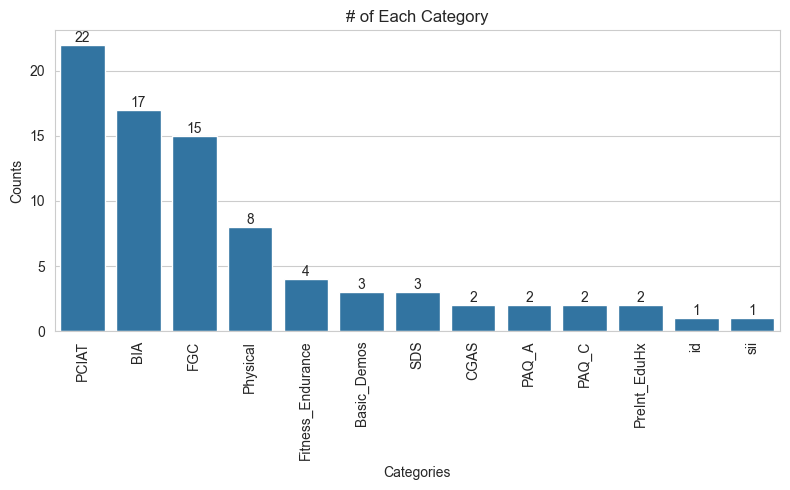

In [701]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# Count of each category
variable_categories = set(map(lambda x: x.split(sep='-')[0], train_df.columns.values))
variable_category_count = Counter(map(lambda x: x.split(sep='-')[0], train_df.columns.values))

# Sort of category count
variable_category_count = dict(variable_category_count.most_common())

# Create bar plot
ax = sns.barplot(x=variable_category_count.keys(), y=variable_category_count.values())
ax.set(xlabel='Categories', ylabel='Counts', title='# of Each Category')
ax.bar_label(ax.containers[0])
plt.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

## 2.1 Demographic Data

-----------------------------Sample Data----------------------------
  Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex
0                      Fall                5                0
1                    Summer                9                0
2                    Summer               10                1
3                    Winter                9                0
4                    Spring               18                1

------------------------Type & Null Analysis------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Basic_Demos-Enroll_Season  3960 non-null   object
 1   Basic_Demos-Age            3960 non-null   int64 
 2   Basic_Demos-Sex            3960 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 92.9+ KB
None

------------------------Categorical Analysis-------

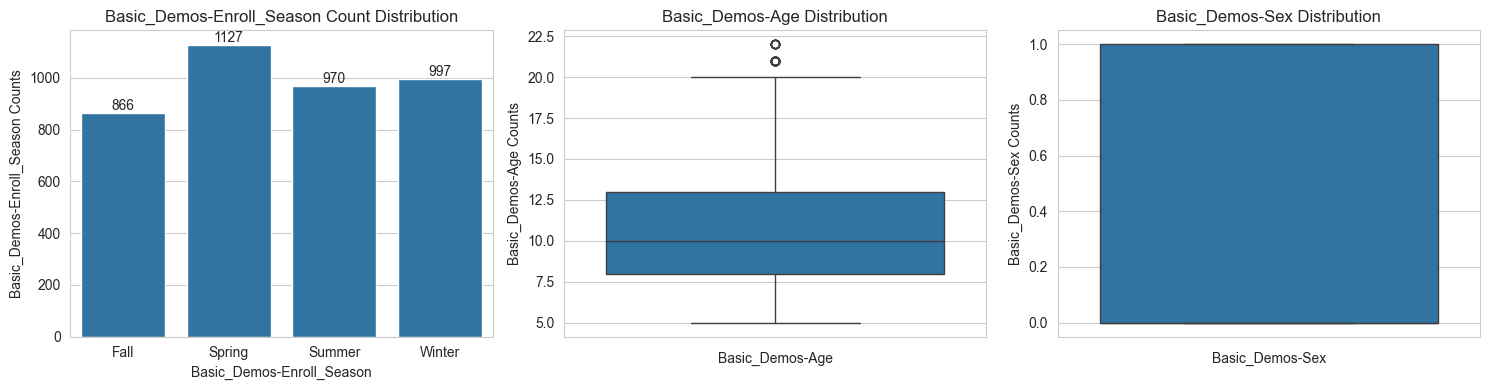

In [702]:
# Get the demographic data
basic_demos_train_df = train_df.loc[:, train_df.columns.map(lambda x: x.split(sep='-')[0]) == 'Basic_Demos']

print('-----------------------------Sample Data----------------------------')
print(basic_demos_train_df.head())
summarize_data(basic_demos_train_df)
generate_eda_plot(basic_demos_train_df)

In [703]:
# Change from 0 to male and 1 to female
train_df['Basic_Demos-Sex'].replace({0: 'male', 1: 'female'}, inplace=True)

-----------------------------Sample Data----------------------------
  Basic_Demos-Enroll_Season  Basic_Demos-Age Basic_Demos-Sex
0                      Fall                5            male
1                    Summer                9            male
2                    Summer               10          female
3                    Winter                9            male
4                    Spring               18          female

------------------------Type & Null Analysis------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Basic_Demos-Enroll_Season  3960 non-null   object
 1   Basic_Demos-Age            3960 non-null   int64 
 2   Basic_Demos-Sex            3960 non-null   object
dtypes: int64(1), object(2)
memory usage: 92.9+ KB
None

------------------------Categorical Analysis-------------

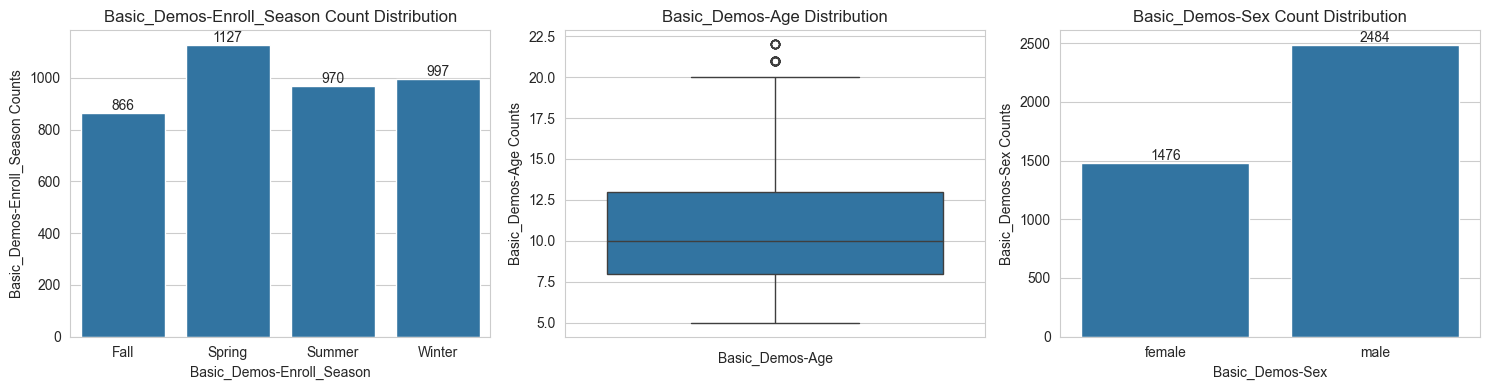

In [704]:
# Show EDA again after cleaning
basic_demos_train_df = train_df.loc[:, train_df.columns.map(lambda x: x.split(sep='-')[0]) == 'Basic_Demos']

print('-----------------------------Sample Data----------------------------')
print(basic_demos_train_df.head())
summarize_data(basic_demos_train_df)
generate_eda_plot(basic_demos_train_df)

## 2.2 Internet Use

-----------------------------Sample Data----------------------------
  PreInt_EduHx-Season  PreInt_EduHx-computerinternet_hoursday
0                Fall                                     3.0
1              Summer                                     0.0
2              Summer                                     2.0
3              Winter                                     0.0
4                 NaN                                     NaN

------------------------Type & Null Analysis------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   PreInt_EduHx-Season                     3540 non-null   object 
 1   PreInt_EduHx-computerinternet_hoursday  3301 non-null   float64
dtypes: float64(1), object(1)
memory usage: 62.0+ KB
None

------------------------Categorical Analysis----

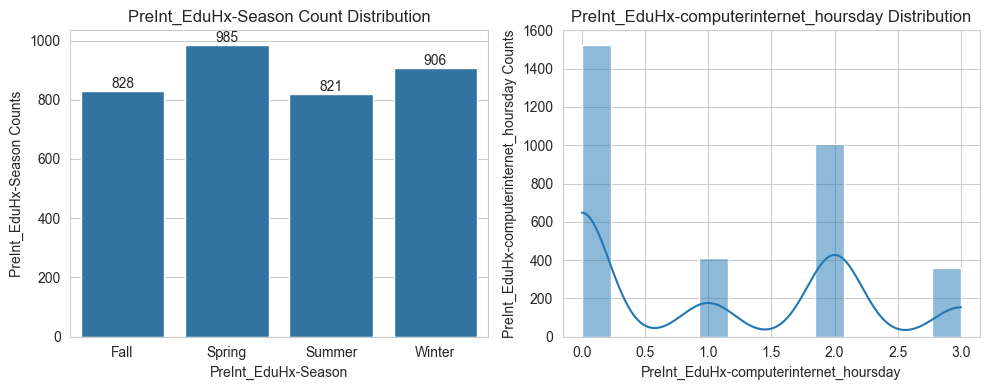

In [687]:
# Show EDA again after cleaning
internet_use_train_df = train_df.loc[:, train_df.columns.map(lambda x: x.split(sep='-')[0]) == 'PreInt_EduHx']

print('-----------------------------Sample Data----------------------------')
print(internet_use_train_df.head())
summarize_data(internet_use_train_df)
generate_eda_plot(internet_use_train_df)

## Observations ##
# 1. Null value in `PreInt_EduHx-computerinternet_hoursday`
# 2. Why `PreInt_EduHx-computerinternet_hoursday` is float64

In [688]:
# Impute `computerinternet_hoursday` with mode
train_df['PreInt_EduHx-computerinternet_hoursday'].fillna(value=train_df['PreInt_EduHx-computerinternet_hoursday'].mode()[0], inplace=True)

# Change `PreInt_EduHx-computerinternet_hoursday` to string
train_df['PreInt_EduHx-computerinternet_hoursday'] = train_df['PreInt_EduHx-computerinternet_hoursday'].astype('int').astype('str')

-----------------------------Sample Data----------------------------
  PreInt_EduHx-Season PreInt_EduHx-computerinternet_hoursday
0                Fall                                      3
1              Summer                                      0
2              Summer                                      2
3              Winter                                      0
4                 NaN                                      0

------------------------Type & Null Analysis------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   PreInt_EduHx-Season                     3540 non-null   object
 1   PreInt_EduHx-computerinternet_hoursday  3960 non-null   object
dtypes: object(2)
memory usage: 62.0+ KB
None

------------------------Categorical Analysis------------------------
 

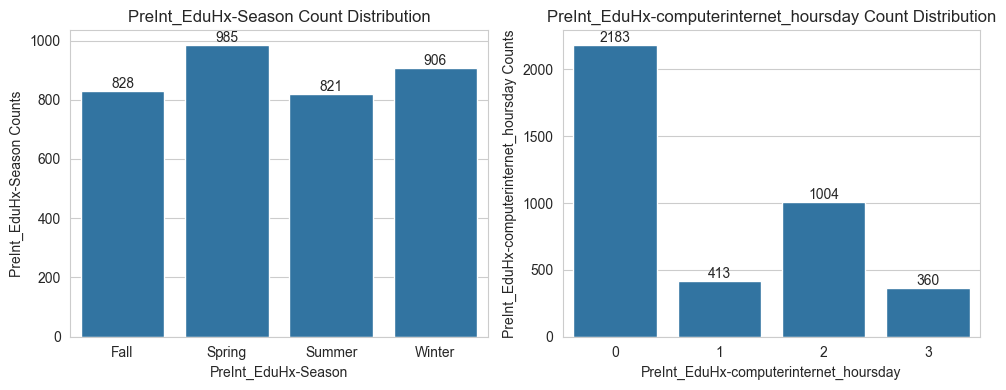

In [689]:
# Show EDA again after cleaning
internet_use_train_df = train_df.loc[:, train_df.columns.map(lambda x: x.split(sep='-')[0]) == 'PreInt_EduHx']

print('-----------------------------Sample Data----------------------------')
print(internet_use_train_df.head())
summarize_data(internet_use_train_df)
generate_eda_plot(internet_use_train_df)

## 2.3 Children's Global Assessment Scale

-----------------------------Sample Data----------------------------
  CGAS-Season  CGAS-CGAS_Score
0      Winter             51.0
1         NaN              NaN
2        Fall             71.0
3        Fall             71.0
4      Summer              NaN

------------------------Type & Null Analysis------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CGAS-Season      2555 non-null   object 
 1   CGAS-CGAS_Score  2421 non-null   float64
dtypes: float64(1), object(1)
memory usage: 62.0+ KB
None

------------------------Categorical Analysis------------------------
       CGAS-Season
count         2555
unique           4
top         Spring
freq           697

-------------------------Numerical Analysis-------------------------
       CGAS-CGAS_Score
count          2421.00
mean             65.45
std              22.34


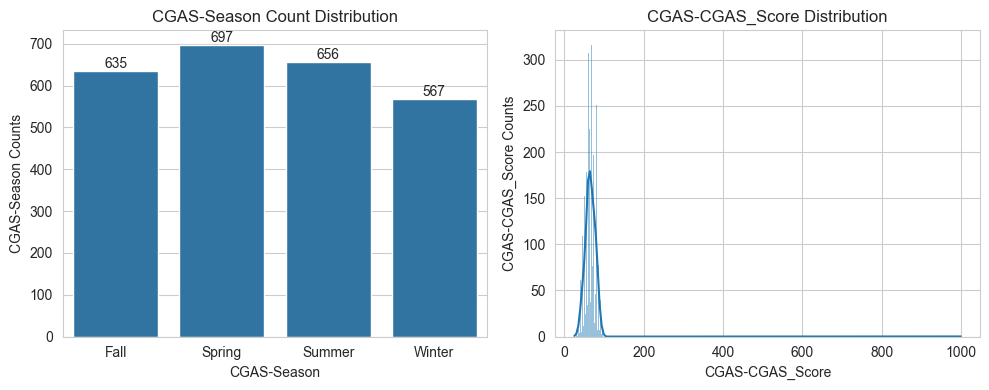

In [690]:
# Get the CGAS data
cgas_train_df = train_df.loc[:, train_df.columns.map(lambda x: x.split(sep='-')[0]) == 'CGAS']

print('-----------------------------Sample Data----------------------------')
print(cgas_train_df.head())
summarize_data(cgas_train_df)
generate_eda_plot(cgas_train_df)

## Observations ##
# 1. Remove 999.00 from CGAS-CGAS_Score
# 2. Impute CGAS-CGAS_Score with mean

In [691]:
train_df.loc[train_df['CGAS-CGAS_Score'].isna(), :]

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
1,000fd460,Summer,9,male,NaN,NaN,Fall,14.035590,48.00,46.0,22.0,75.0,70.0,122.0,NaN,NaN,NaN,NaN,Fall,3.0,0.0,NaN,NaN,NaN,NaN,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,Winter,2.0,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.211720,3.97085,1.0,21.0352,14.9740,39.4497,15.4107,27.0552,NaN,NaN,Fall,2.34,Fall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0,0.0
4,0016bb22,Spring,18,female,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
6,0038ba98,Fall,10,male,NaN,NaN,Fall,19.660760,55.00,84.6,NaN,123.0,83.0,163.0,NaN,NaN,NaN,NaN,Fall,9.0,1.0,NaN,NaN,NaN,NaN,2.0,0.0,11.0,1.0,11.0,1.0,11.0,1.0,Fall,2.0,3.78271,19.6629,1135.860,1817.38,16.32750,63.2470,14.7000,4.962910,21.35300,2.0,30.8936,16.0259,59.4643,26.1957,47.2211,NaN,NaN,Winter,3.67,Winter,1.0,4.0,1.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,4.0,1.0,0.0,20.0,Winter,27.0,40.0,Fall,3,0.0
7,0068a485,Fall,10,female,NaN,NaN,Fall,16.861286,59.25,84.2,27.0,71.0,90.0,116.0,NaN,NaN,NaN,NaN,Fall,0.0,0.0,12.6,2.0,11.1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,Fall,3.0,4.05726,16.8631,1180.040,1888.06,21.94000,67.9527,13.6092,3.253950,16.24740,2.0,28.5367,17.4760,63.8954,28.7680,50.4767,NaN,NaN,Fall,1.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,2,NaN
8,0069fbed,Summer,15,male,NaN,NaN,Spring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3951,ff18b749,Spring,7,male,NaN,NaN,Summer,14.768842,47.50,47.4,NaN,58.0,99.0,98.0,Summer,NaN,NaN,NaN,Fall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Summer,62.0,85.0,Spring,0,0.0
3953,ff6c2bb8,Fall,8,male,NaN,NaN,Fall,17.139810,52.50,6

In [692]:
# 1. Remove 999.00 from CGAS-CGAS_Score
train_df = train_df.loc[train_df['CGAS-CGAS_Score'] < 999, :]

# 2. Impute CGAS-CGAS_Score with mean
train_df['CGAS-CGAS_Score'] = train_df['CGAS-CGAS_Score'].fillna(value=train_df['CGAS-CGAS_Score'].mean())

-----------------------------Sample Data----------------------------
   CGAS-Season  CGAS-CGAS_Score
0       Winter             51.0
2         Fall             71.0
3         Fall             71.0
5       Winter             50.0
11      Summer             66.0

------------------------Type & Null Analysis------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 2420 entries, 0 to 3958
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CGAS-Season      2420 non-null   object 
 1   CGAS-CGAS_Score  2420 non-null   float64
dtypes: float64(1), object(1)
memory usage: 56.7+ KB
None

------------------------Categorical Analysis------------------------
       CGAS-Season
count         2420
unique           4
top         Spring
freq           685

-------------------------Numerical Analysis-------------------------
       CGAS-CGAS_Score
count          2420.00
mean             65.07
std              11.79

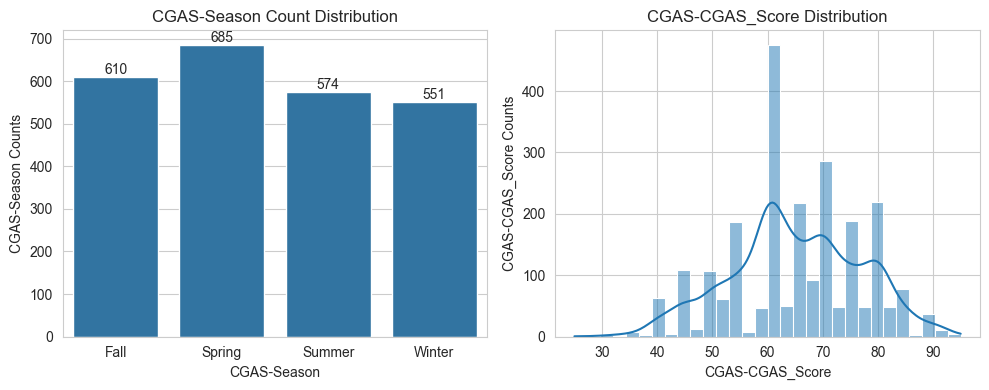

In [693]:
# Show EDA again
cgas_train_df = train_df.loc[:, train_df.columns.map(lambda x: x.split(sep='-')[0]) == 'CGAS']

print('-----------------------------Sample Data----------------------------')
print(cgas_train_df.head())
summarize_data(cgas_train_df)
generate_eda_plot(cgas_train_df)

## 2.4 Physical Measures

In [1]:
# Get the physical data
physical_train_df = train_df.loc[:, train_df.columns.map(lambda x: x.split(sep='-')[0]) == 'Physical']

print('-----------------------------Sample Data----------------------------')
print(physical_train_df.head())
summarize_data(physical_train_df)
generate_eda_plot(physical_train_df)

NameError: name 'train_df' is not defined